<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/IMDb_Economist_tv_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from plotnine import *

Data Source: https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-01-08

In [2]:
ratings = pd.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/IMDb_Economist_tv_ratings.csv")

In [ ]:
ratings

,titleId,seasonNumber,title,date,av_rating,share,genres
0,tt2879552,1,11.22.63,2016-03-10,8.4890,0.51,"Drama,Mystery,Sci-Fi"
1,tt3148266,1,12 Monkeys,2015-02-27,8.3407,0.46,"Adventure,Drama,Mystery"
2,tt3148266,2,12 Monkeys,2016-05-30,8.8196,0.25,"Adventure,Drama,Mystery"
3,tt3148266,3,12 Monkeys,2017-05-19,9.0369,0.19,"Adventure,Drama,Mystery"
4,tt3148266,4,12 Monkeys,2018-06-26,9.1363,0.38,"Adventure,Drama,Mystery"
...,...,...,...,...,...,...,...
2261,tt3250026,3,Zoo,2017-07-31,7.4132,0.09,"Drama,Mystery,Sci-Fi"
2262,tt3501584,1,iZombie,2015-04-28,8.4296,0.59,"Comedy,Crime,Drama"
2263,tt3501584,2,iZombie,2016-01-07,8.5641,0.43,"Comedy,Crime,Drama"
2264,tt3501584,3,iZombie,2017-05-16,8.4077,0.23,"Comedy,Crime,Drama"


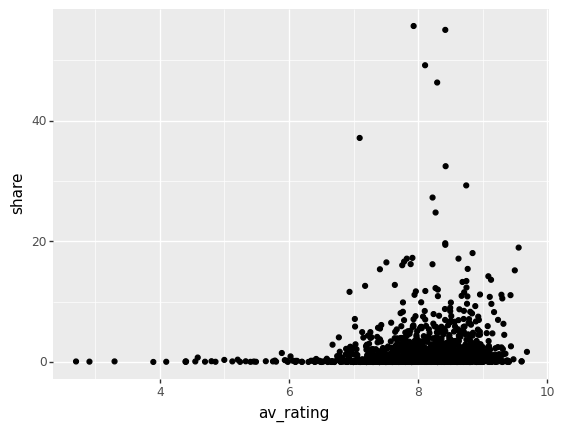

<ggplot: (8792245304398)>

In [ ]:
(
    ggplot(
        aes(
            x = 'av_rating',
            y = 'share'
        ),
        data = ratings
    ) +
    geom_point()
)

Now we can ask: What titles have a [share][1] greater than 20?

[1]: https://en.wikipedia.org/wiki/Audience_measurement#Terminology

In [3]:
threshold = 20
ratings[ratings['share'] > threshold].sort_values(by = 'share')

,titleId,seasonNumber,title,date,av_rating,share,genres
2064,tt0106179,4,The X-Files,1997-01-22,8.2685,24.76,"Drama,Mystery,Sci-Fi"
517,tt0092337,1,Dekalog,1990-04-13,8.2218,27.24,Drama
2120,tt0098936,1,Twin Peaks,1990-04-29,8.7429,29.25,"Crime,Drama,Mystery"
2065,tt0106179,5,The X-Files,1998-02-04,8.4239,32.43,"Drama,Mystery,Sci-Fi"
1667,tt0106145,1,Star Trek: Deep Space Nine,1993-03-25,7.0936,37.11,"Action,Adventure,Drama"
2063,tt0106179,3,The X-Files,1996-01-12,8.2933,46.29,"Drama,Mystery,Sci-Fi"
2062,tt0106179,2,The X-Files,1995-01-11,8.1062,49.15,"Drama,Mystery,Sci-Fi"
2121,tt0098936,2,Twin Peaks,1991-01-11,8.4187,55.01,"Crime,Drama,Mystery"
2061,tt0106179,1,The X-Files,1994-01-04,7.9288,55.65,"Drama,Mystery,Sci-Fi"


Next we can ask: what's the total [share][1] taken up by "The X-Files"?

[1]: https://en.wikipedia.org/wiki/Audience_measurement#Terminology

In [ ]:
ratings[ratings['title'] == "The X-Files"]['share'].sum()

266.59

Whoa, OK. So `share` definitely doesn't sum to 100% Does it sum to anything meaningful?

In [ ]:
ratings['share'].sum()

2900.4399999999996

What happens when we *exclude* shows with a share below a certain threshold?

In [ ]:
threshold = 1
high_share_shows = ratings[ratings['share'] > threshold]

high_share_shows

,titleId,seasonNumber,title,date,av_rating,share,genres
5,tt1837492,1,13 Reasons Why,2017-03-31,8.4370,2.38,"Drama,Mystery"
6,tt1837492,2,13 Reasons Why,2018-05-18,7.5089,2.19,"Drama,Mystery"
7,tt0285331,1,24,2002-02-16,8.5641,6.67,"Action,Crime,Drama"
8,tt0285331,2,24,2003-02-09,8.7028,7.13,"Action,Crime,Drama"
9,tt0285331,3,24,2004-02-09,8.7173,5.88,"Action,Crime,Drama"
...,...,...,...,...,...,...,...
2234,tt0112230,2,Xena: Warrior Princess,1997-01-16,7.8023,2.46,"Action,Adventure,Drama"
2235,tt0112230,3,Xena: Warrior Princess,1998-01-09,7.9777,3.88,"Action,Adventure,Drama"
2236,tt0112230,4,Xena: Warrior Princess,1999-01-16,7.6438,2.07,"Action,Adventure,Drama"
2237,tt0112230,5,Xena: Warrior Princess,2000-01-20,7.7623,1.98,"Action,Adventure,Drama"


And what happens when we plot these?

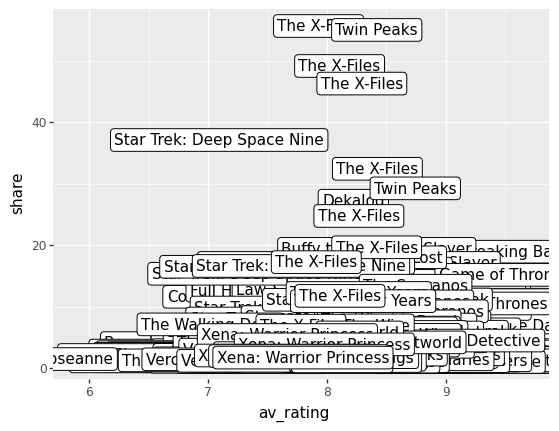

<ggplot: (8792245200932)>

In [ ]:
(
    ggplot(
        aes(
            x = 'av_rating',
            y = 'share',
            label = 'title'
        ),
        data = high_share_shows
    ) +
    geom_label()
)